In [36]:
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import probplot
import pandas as pd

Here we have a QQ plot (Quantile Quantile plot) which we use to compare normalised data to a normal distribution. To put it simply, we are normalising our data by subtracting the mean and then dividing by the standard deviation eg.
[(x - x.mean())/x.std()]. We are then comparing the quantiles of our normalised data to the quantiles of a normal distribution, we have used stats.norm.rvs(size=100) to generate a normal distribution that we can compare our data to. From here we have used stats.probplot() to generate a probability plot of our sample data against a specified theoretical distribution, default being a normal distribution. 

While raw data is often not normally distributed, some estimates like errors, averages and totals in large samples usually are. 

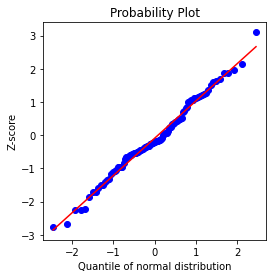

In [52]:
fig, ax = plt.subplots(figsize=(4,4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)
ax.set_xlabel('Quantile of normal distribution')
ax.set_ylabel('Z-score')
plt.show()

This is a QQ plot of right-skewed data.It shows a curve and is known as a 'positive skew'. 



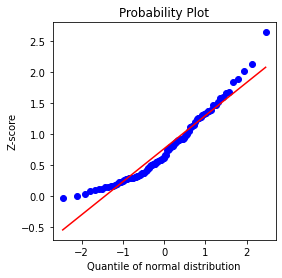

In [51]:
fig, ax = plt.subplots(figsize=(4,4))
skew_sample = stats.skewnorm.rvs(size=100, a=8)
stats.probplot(skew_sample, plot=ax)
ax.set_xlabel('Quantile of normal distribution')
ax.set_ylabel('Z-score')
plt.show()

This is a dataset that is skewed to the left, it again shows a noticeable curve and is known as a 'negative skew'. 

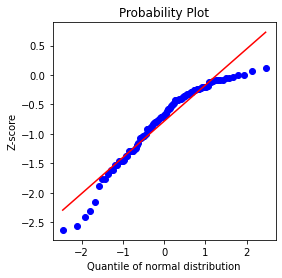

In [50]:
fig, ax = plt.subplots(figsize=(4,4))
skew_sample = stats.skewnorm.rvs(size=100, a=-8)
stats.probplot(skew_sample, plot=ax)
ax.set_xlabel('Quantile of normal distribution')
ax.set_ylabel('Z-score')
plt.show()

In [37]:
df = pd.read_csv('loans_income.csv')
df.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


Here I have imported a real world dataset of income information for loans. From the histogram it appears to be skewed right. I will attempt to create a QQ plot to confirm this. Firstly, I have to normalize the data to convert them to z-scores. I do this by subtracting the mean and then dividing by the standard deviation. 

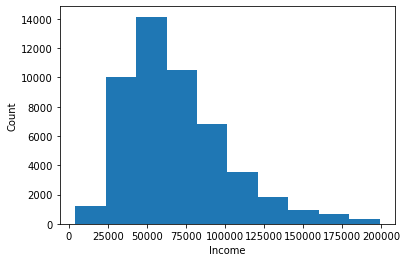

In [48]:
plt.hist(df.x)
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

In [41]:
df['x-z'] = (df['x']-df['x'].mean())/df['x'].std()
df.head()

,x,x-z
0,67000,-0.053557
1,52000,-0.509872
2,100000,0.950336
3,78762,0.304255
4,37041,-0.964939


Here we can clearly see that the data does not fit the line and has a right-skewed curve (positive curve).

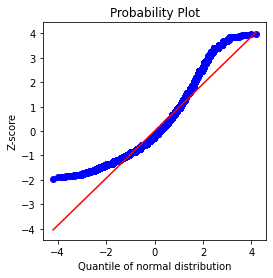

In [49]:
fig, ax = plt.subplots(figsize=(4,4))
stats.probplot(df['x-z'], plot=ax)
ax.set_xlabel('Quantile of normal distribution')
ax.set_ylabel('Z-score')
plt.show()